# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Loading and Understanding Data

In [2]:
df = pd.read_csv("most_streamed_spotify_songs_2024.csv", encoding="ISO-8859-1")
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
df.shape

(4600, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

Spotify Streams, Spotify PLaylist Count, Spotify Playlist Reach, and Release Date doesnt have the right Dtype. We have to convert them

In [5]:
df['Spotify Streams'] = df['Spotify Streams'].str.replace(',','').astype(float)
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].str.replace(',','').astype(float)
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].str.replace(',','').astype(float)
df['Release Date'] = pd.to_datetime(df['Release Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   object      

We only interested in the spotify data, so we can drop the other columns

In [6]:
unimportant_columns = ['ISRC', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 
                   'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
                   'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
                   'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity']
df.drop(columns=unimportant_columns, inplace=True)
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'Explicit Track'],
      dtype='object')

For sake of simplicity and analysis, we rename some columns.

In [7]:
#Drop Release Date and replace with Year
df['Year'] = df['Release Date'].dt.year
df.drop(columns='Release Date', inplace=True)

#Replace column with whitespace with underscores
df.columns = df.columns.str.replace('Spotify ', '')
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Track', 'Album_Name', 'Artist', 'All_Time_Rank', 'Track_Score',
       'Streams', 'Playlist_Count', 'Playlist_Reach', 'Popularity',
       'Explicit_Track', 'Year'],
      dtype='object')

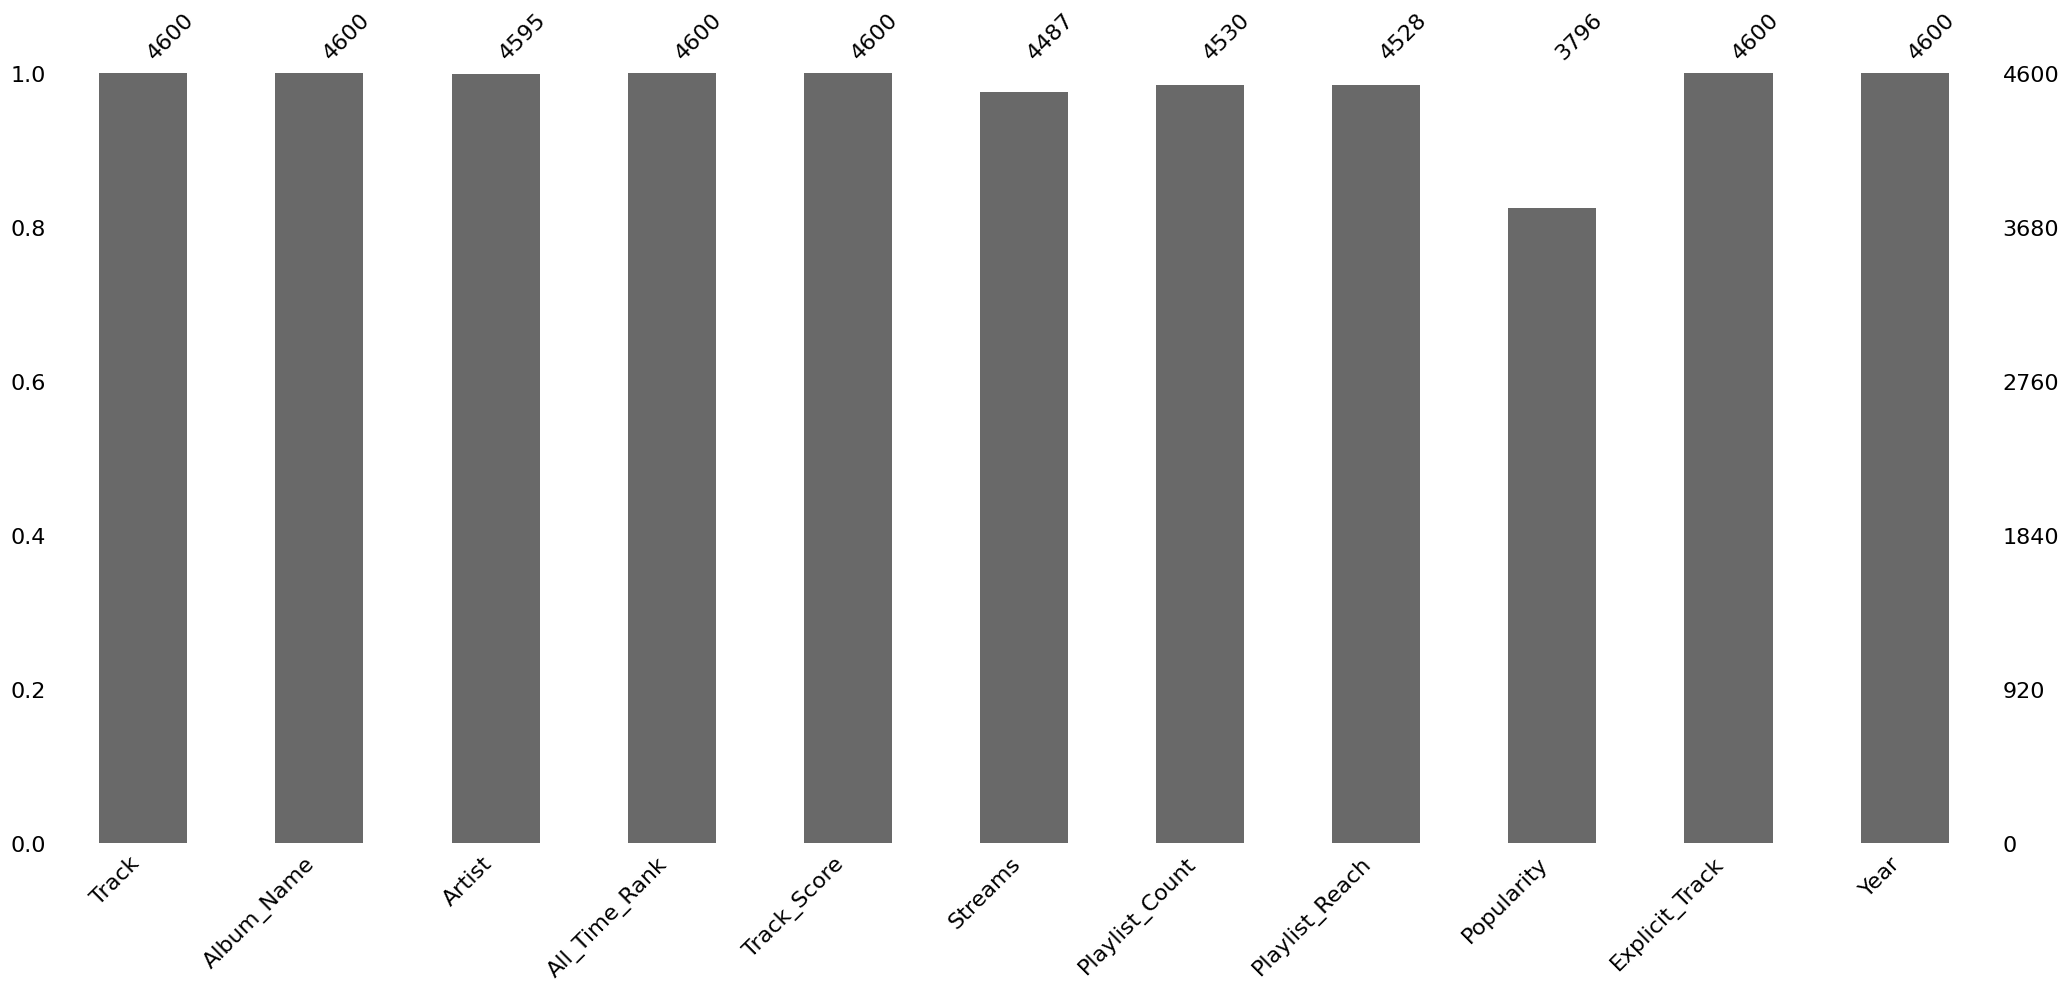

In [8]:
import missingno as msno
# Visualize the missing values
msno.bar(df)
plt.show()

In [9]:
df.isnull().sum().sort_values(ascending = False)

Popularity        804
Streams           113
Playlist_Reach     72
Playlist_Count     70
Artist              5
Album_Name          0
Track               0
All_Time_Rank       0
Track_Score         0
Explicit_Track      0
Year                0
dtype: int64

# Data Cleaning

![Screenshot 2024-09-18 162837.png](<attachment:Screenshot 2024-09-18 162837.png>)
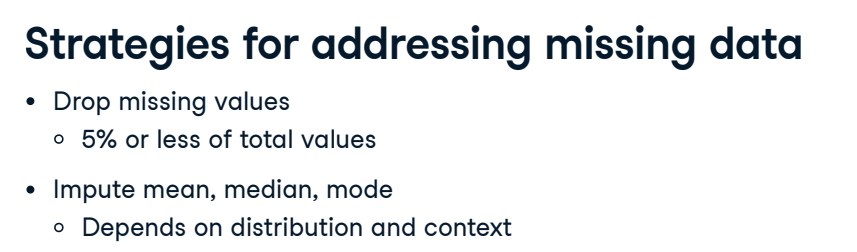

In [10]:
df.describe()

,Track_Score,Streams,Playlist_Count,Playlist_Reach,Popularity,Explicit_Track,Year
count,4600.000000,4.487000e+03,4530.000000,4.528000e+03,3796.000000,4600.000000,4600.000000
mean,41.844043,4.473873e+08,59390.829801,2.334682e+07,63.501581,0.358913,2020.616739
std,38.543766,5.384439e+08,71131.406625,2.968717e+07,16.186438,0.479734,3.611707
min,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,0.000000,1987.000000
25%,23.300000,7.038630e+07,6718.000000,4.791612e+06,61.000000,0.000000,2019.000000
50%,29.900000,2.398507e+08,32312.500000,1.325948e+07,67.000000,0.000000,2022.000000
75%,44.425000,6.283638e+08,86038.750000,2.966069e+07,73.000000,1.000000,2023.000000
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.000000,2024.000000


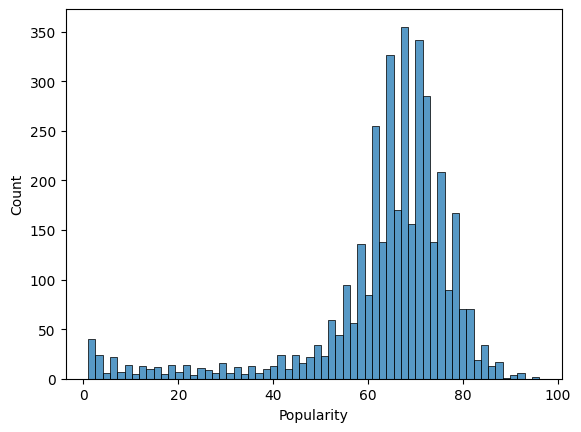

In [11]:
sns.histplot(data=df, x ='Popularity')
plt.show()

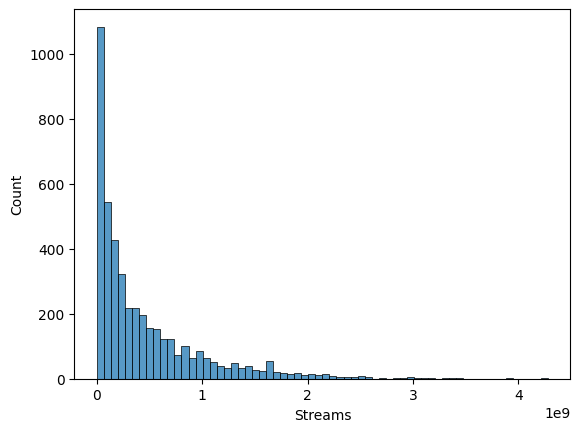

In [24]:
sns.histplot(data=df, x ='Streams')
plt.show()

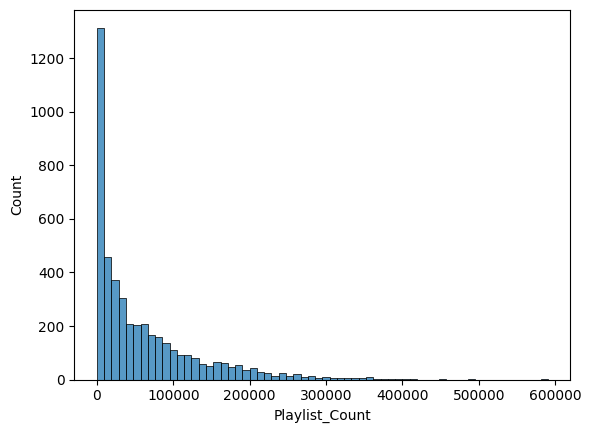

In [13]:
sns.histplot(data=df, x ='Playlist_Count')
plt.show()

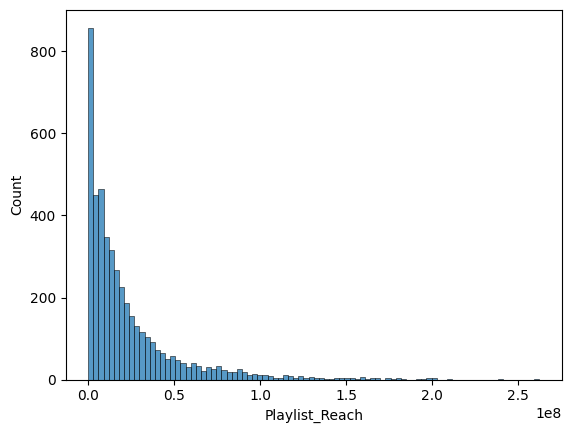

In [14]:
sns.histplot(data=df, x ='Playlist_Reach')
plt.show()

Based on the histogram, we can impute the column using median because it is right-skewed distributed.

In [15]:
df = df.map(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df

,Track,Album_Name,Artist,All_Time_Rank,Track_Score,Streams,Playlist_Count,Playlist_Reach,Popularity,Explicit_Track,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,0,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,0,2024
3,Flowers,Flowers - Single,Miley Cyrus,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,0,2023
4,Houdini,Houdini,Eminem,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,1,2024
...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,4585,19.4,3.050500e+08,65770.0,5103054.0,71.0,1,2017
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,4575,19.4,5.228236e+07,4602.0,1449767.0,56.0,0,2018
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,4571,19.4,1.899727e+08,72066.0,6704802.0,65.0,1,2020
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,4591,19.4,1.454670e+08,14037.0,7387064.0,66.0,0,2016


Creating new columns - Extracting year and month from Datetime column

In [16]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format = '%m/%d/%Y')

df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month



KeyError: 'Release Date'

Dealing with duplicates

In [13]:
df.duplicated().sum()

np.int64(2)

Keeping only first occurrence

In [14]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

np.int64(0)

Formatting all the datatypes

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4463 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Track                   4463 non-null   object        
 1   Album Name              4463 non-null   object        
 2   Artist                  4463 non-null   object        
 3   Release Date            4463 non-null   datetime64[ns]
 4   All Time Rank           4463 non-null   object        
 5   Track Score             4463 non-null   float64       
 6   Spotify Streams         4463 non-null   object        
 7   Spotify Playlist Count  4463 non-null   object        
 8   Spotify Playlist Reach  4463 non-null   object        
 9   Spotify Popularity      3778 non-null   float64       
 10  Explicit Track          4463 non-null   int64         
 11  Year                    4463 non-null   int32         
 12  Month                   4463 non-null   int32        

In [16]:
for x in df.columns[6:]:
    df.loc[:,x] = pd.to_numeric(df[x])
    print(df[x].dtype)
    

object
object
object
float64
int64
int32
int32


Imputing mean for null values in numerical columns using SimpleImputer

In [17]:
from sklearn.impute import SimpleImputer

for col in df.columns[6:]:
    df.loc[:,col] = pd.to_numeric(df[col], errors = "coerce")
    
imputer = SimpleImputer(strategy = "mean")

for col in df.columns[6:]:
    df.loc[:,col] = imputer.fit_transform(df[[col]])

print(df.isnull().sum())


Track                     0
Album Name                0
Artist                    0
Release Date              0
All Time Rank             0
Track Score               0
Spotify Streams           0
Spotify Playlist Count    0
Spotify Playlist Reach    0
Spotify Popularity        0
Explicit Track            0
Year                      0
Month                     0
dtype: int64


# EDA

Correlation Matrix

<Axes: >

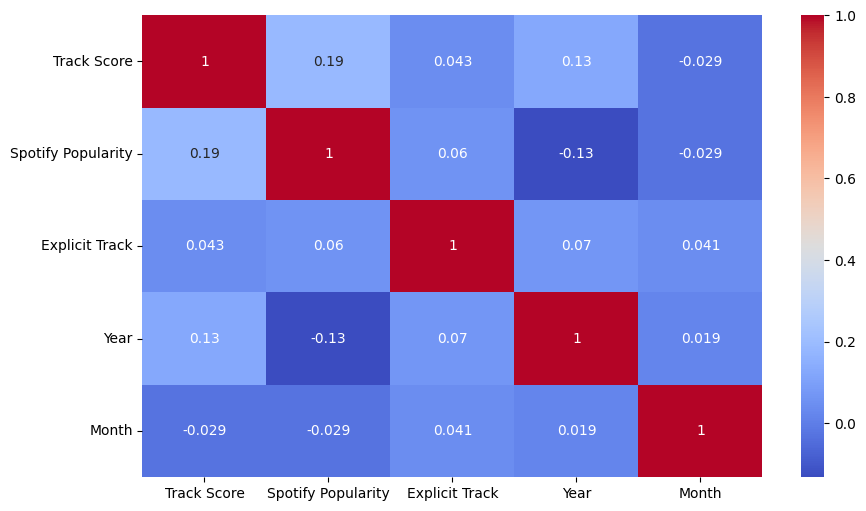

In [18]:
plt.figure(figsize = (10, 6))
numeric_df = df.select_dtypes(include = ['float64', 'int64', 'int32'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")

Top 20 Streaming Artists on Spotify

C:\Users\MSI\AppData\Local\Temp\ipykernel_816\589442806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y = 'Artist', x ='Spotify Streams', data = top_20_spotify_artists, palette = 'crest')


Text(0.5, 1.0, 'Top 20 Streaming Artists on Spotify')

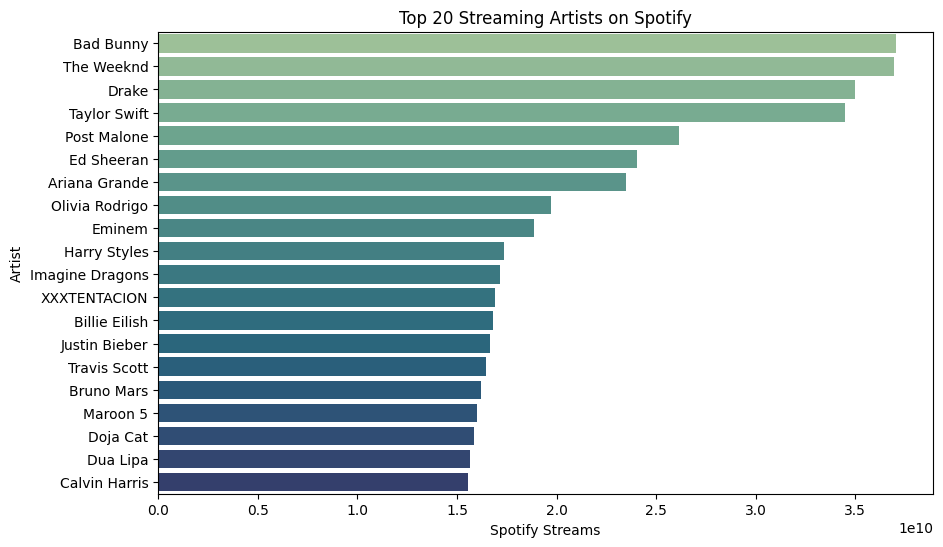

In [19]:
top_20_spotify_artists = df.groupby('Artist', as_index = False)['Spotify Streams'].sum()
top_20_spotify_artists = top_20_spotify_artists.sort_values('Spotify Streams', ascending=False).head(20)
top_20_spotify_artists = top_20_spotify_artists.dropna(subset=['Spotify Streams', 'Artist'])

plt.figure(figsize = (10, 6))
ax = sns.barplot(y = 'Artist', x ='Spotify Streams', data = top_20_spotify_artists, palette = 'crest')

plt.title('Top 20 Streaming Artists on Spotify')

Top 20 Streaming Songs on Spotify

C:\Users\MSI\AppData\Local\Temp\ipykernel_816\2124726849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Track', x = 'Spotify Streams', data = top_20_spotify_tracks, palette = 'crest')


Text(0.5, 1.0, 'Top 20 Streaming Songs on Spotify')

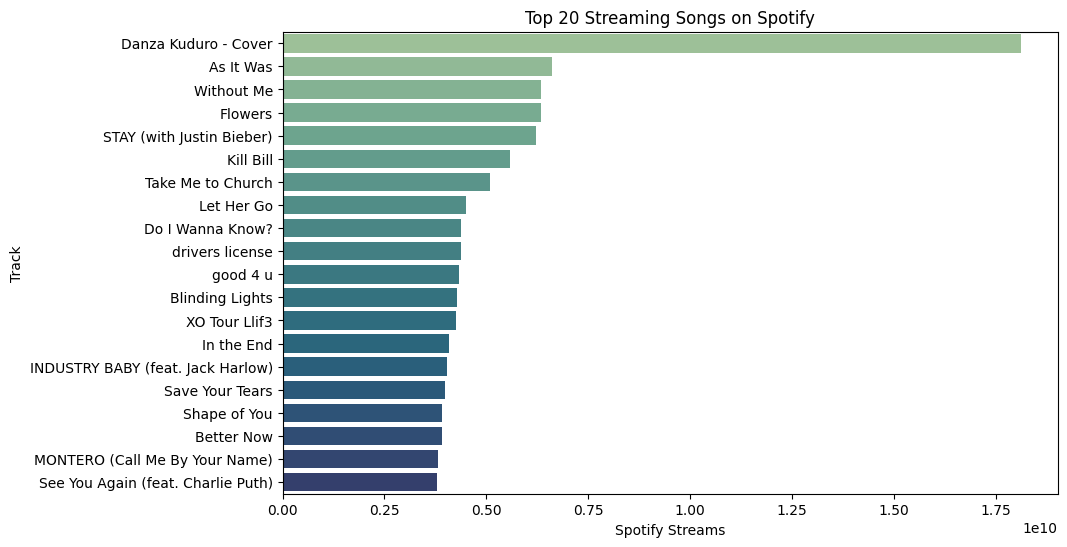

In [20]:
top_20_spotify_tracks = df.groupby('Track', as_index = False)['Spotify Streams'].sum()
top_20_spotify_tracks = top_20_spotify_tracks.sort_values('Spotify Streams', ascending = False).head(20)
top_20_spotify_tracks = top_20_spotify_tracks.dropna(subset=['Spotify Streams', 'Track'])

plt.figure(figsize = (10,6))
sns.barplot(y = 'Track', x = 'Spotify Streams', data = top_20_spotify_tracks, palette = 'crest')
plt.title('Top 20 Streaming Songs on Spotify')

Top 20 Streaming Artists on YouTube

In [21]:
top_20_youtube_artists = df.groupby('Artist', as_index = False)['YouTube Views'].sum()
top_20_youtube_artists = top_20_youtube_artists.sort_values('YouTube Views', ascending = False).head(20)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'YouTube Views', y = 'Artist', data = top_20_youtube_artists, palette = 'icefire')
plt.title('Top 20 Streaming Artists on YouTube')

KeyError: 'Column not found: YouTube Views'

Top 20 Streaming Songs on YouTube

C:\Users\MSI\AppData\Local\Temp\ipykernel_12556\2900565031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'YouTube Views', y = 'Track', data = top_20_youtube_tracks, palette = 'icefire')


Text(0.5, 1.0, 'Top 20 Streaming Songs on YouTube')

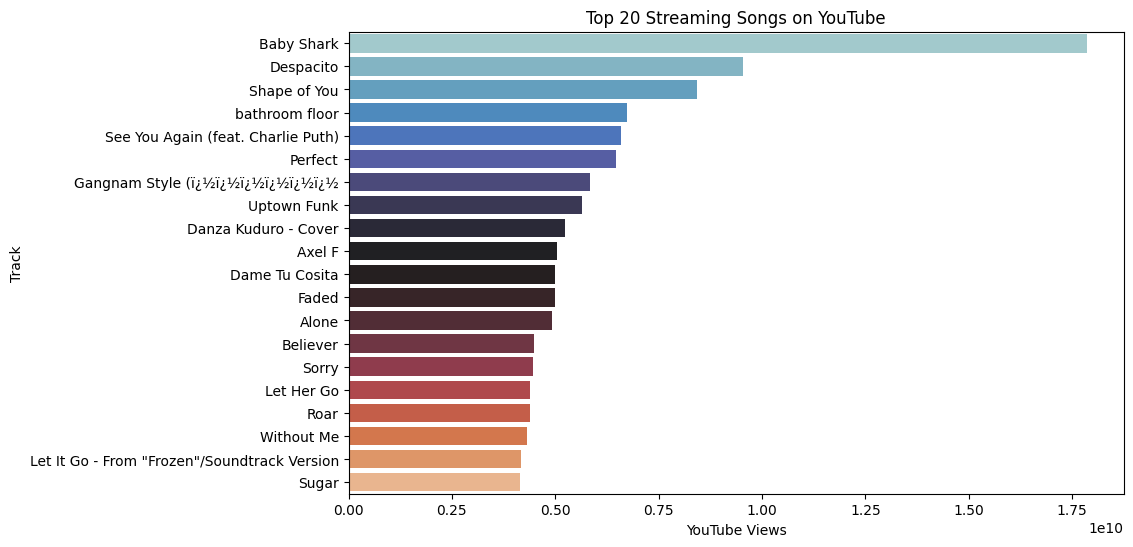

In [20]:
top_20_youtube_tracks = df.groupby('Track', as_index = False)['YouTube Views'].sum()
top_20_youtube_tracks = top_20_youtube_tracks.sort_values('YouTube Views', ascending = False).head(20)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'YouTube Views', y = 'Track', data = top_20_youtube_tracks, palette = 'icefire')
plt.title('Top 20 Streaming Songs on YouTube')

In [21]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track', 'Year', 'Month'],
      dtype='object')

Trend of Track Releases

Text(0.5, 0, 'Year')

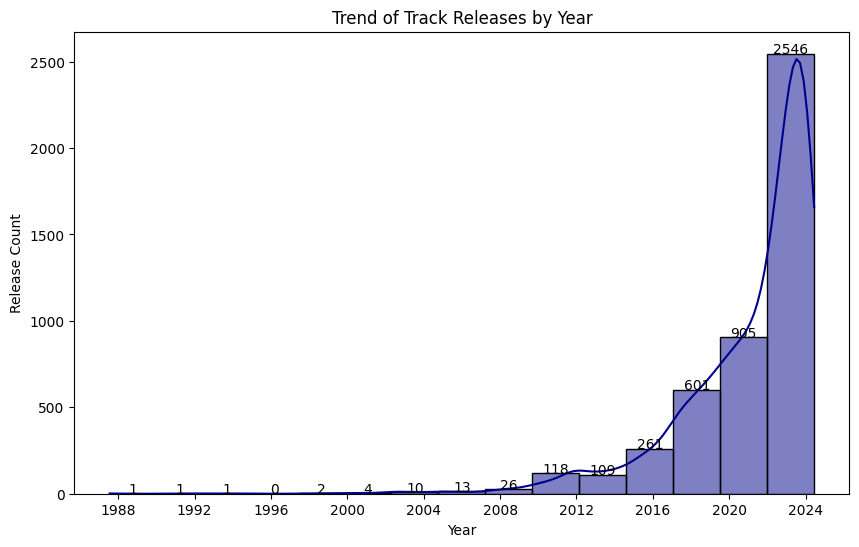

In [22]:
plt.figure(figsize = (10, 6))
ax = sns.histplot(df['Release Date'], bins = 15, kde = True, color = 'darkblue')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha = "center")


plt.title('Trend of Track Releases by Year')
plt.ylabel('Release Count')
plt.xlabel('Year')

Let's view the release trend in the last 5 years.

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

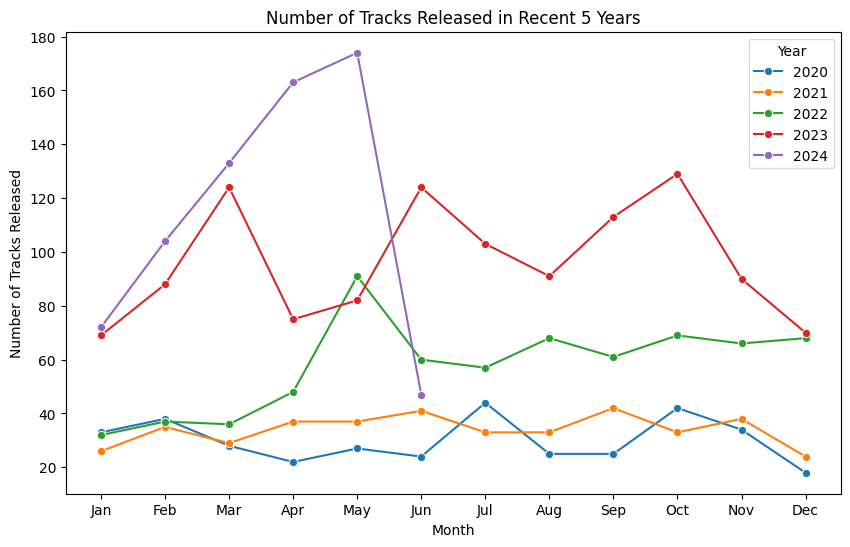

In [23]:
import calendar

plt.figure(figsize = (10,6))

monthly_releases = df.groupby(['Year','Month']).size().reset_index(name = "Count")
recent_years = monthly_releases.Year.unique()[-5:]
recent_data = monthly_releases[monthly_releases['Year'].isin(recent_years)]

ax = sns.lineplot(data=recent_data, x='Month', y='Count', hue='Year', palette='tab10', marker = 'o')
plt.title('Number of Tracks Released in Recent 5 Years')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')

month_names = [calendar.month_abbr[i] for i in range(1,13)]
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)

Spotify Streams vs Playlist Counts with Explicit Content

<Axes: xlabel='Spotify Streams', ylabel='Spotify Playlist Count'>

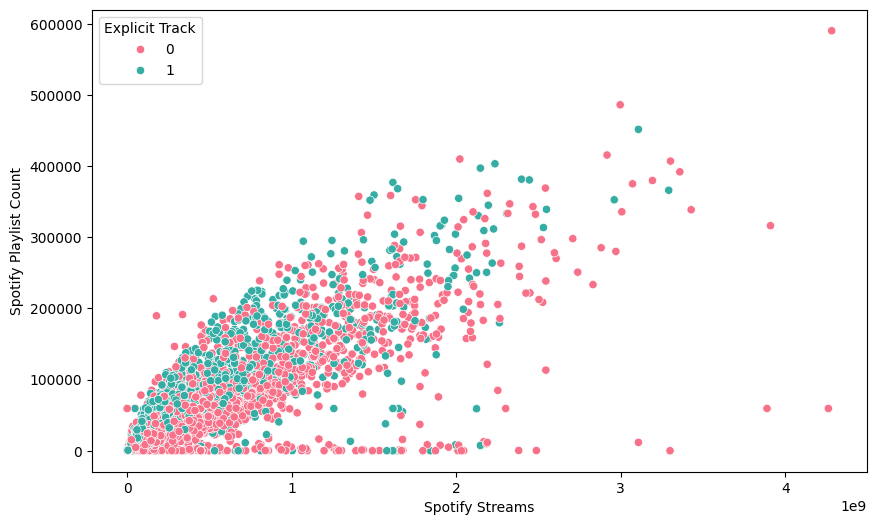

In [24]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Spotify Streams', y = 'Spotify Playlist Count', hue = 'Explicit Track',data = df, palette = 'husl')

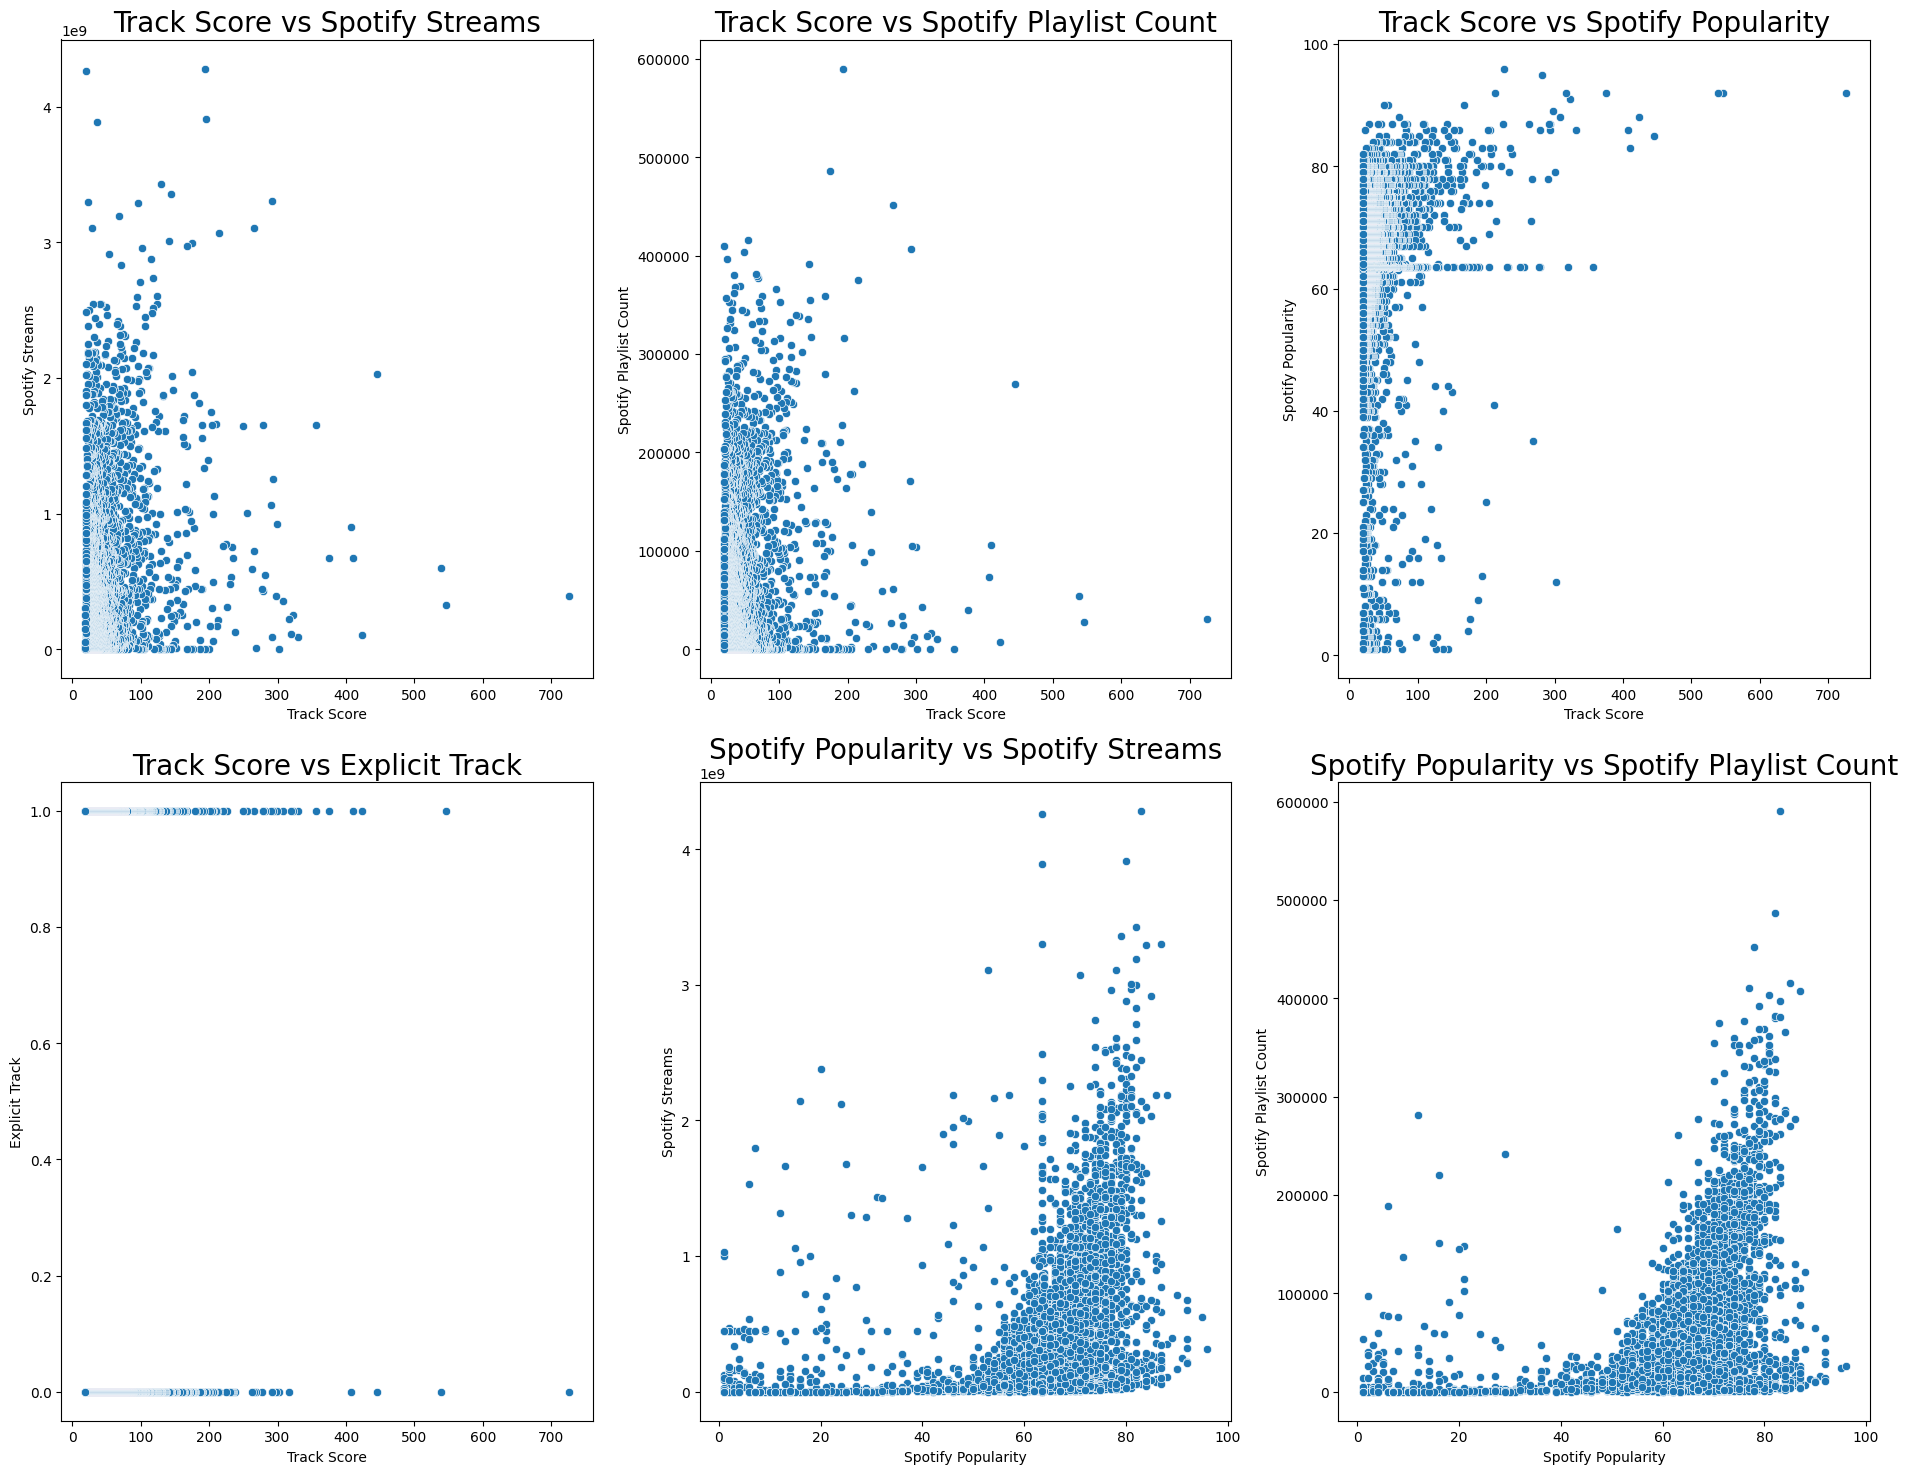

In [25]:
fig, ax = plt.subplots(figsize=(19,15),nrows=2,ncols=3)


sns.scatterplot(x='Track Score', y='Spotify Streams', data=df,ax=ax[0,0])
ax[0,0].set_xlabel('Track Score')
ax[0,0].set_ylabel('Spotify Streams')
ax[0,0].set_title('Track Score vs Spotify Streams',fontsize=20)


sns.scatterplot(x='Track Score', y='Spotify Playlist Count', data=df,ax=ax[0,1])
ax[0,1].set_xlabel('Track Score')
ax[0,1].set_ylabel('Spotify Playlist Count')
ax[0,1].set_title('Track Score vs Spotify Playlist Count',fontsize=20)


sns.scatterplot(x='Track Score', y='Spotify Popularity', data=df,ax=ax[0,2])
ax[0,2].set_xlabel('Track Score')
ax[0,2].set_ylabel('Spotify Popularity')
ax[0,2].set_title('Track Score vs Spotify Popularity',fontsize=20)


sns.scatterplot(x='Track Score', y='Explicit Track', data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Track Score')
ax[1,0].set_ylabel('Explicit Track')
ax[1,0].set_title('Track Score vs Explicit Track',fontsize=20)


sns.scatterplot(x='Spotify Popularity', y='Spotify Streams', data=df,ax=ax[1,1])
ax[1,1].set_xlabel('Spotify Popularity')
ax[1,1].set_ylabel('Spotify Streams')
ax[1,1].set_title('Spotify Popularity vs Spotify Streams',fontsize=20)


sns.scatterplot(x='Spotify Popularity', y='Spotify Playlist Count', data=df,ax=ax[1,2])
ax[1,2].set_xlabel('Spotify Popularity')
ax[1,2].set_ylabel('Spotify Playlist Count')
ax[1,2].set_title('Spotify Popularity vs Spotify Playlist Count',fontsize=20)


plt.tight_layout()
plt.show()